In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_decomposition import CCA

In [2]:
dane = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(dane)
df = df.dropna()
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [7]:
X = df[['bill_length_mm','bill_depth_mm']]
X.head()

bill_length_mm  bill_depth_mm
0            39.1           18.7
1            39.5           17.4
2            40.3           18.0
4            36.7           19.3
5            39.3           20.6

In [71]:
X_sta = (X-X.mean())/(X.std())
X_sta.head()

bill_length_mm  bill_depth_mm
0       -0.894695       0.779559
1       -0.821552       0.119404
2       -0.675264       0.424091
4       -1.333559       1.084246
5       -0.858123       1.744400

In [68]:
Y = df[['flipper_length_mm','body_mass_g']]
Y.head()

flipper_length_mm  body_mass_g
0              181.0       3750.0
1              186.0       3800.0
2              195.0       3250.0
4              193.0       3450.0
5              190.0       3650.0

In [72]:
Y_sta = (Y-Y.mean())/(Y.std())
Y_sta.head()

flipper_length_mm  body_mass_g
0          -1.424608    -0.567621
1          -1.067867    -0.505525
2          -0.425733    -1.188572
4          -0.568429    -0.940192
5          -0.782474    -0.691811

In [73]:
korelacja = CCA()
korelacja.fit(X_sta, Y_sta)
X_c, Y_c = korelacja.transform(X_sta, Y_sta)

In [84]:
kowa_kanon_res = pd.DataFrame({"CCX1_dlu_dzi":X_c[:, 0],
                       "CCY1_dlu_ple":Y_c[:, 0],
                       "CCX2_sze_dzi":X_c[:, 1],
                       "CCY2_mas_cia":Y_c[:, 1],
                       "Gatunek":df.species.tolist(),
                       "Wyspa":df.island.tolist(),
                       "plec":df.sex.tolist()})
kowa_kanon_res.head()

CCX1_dlu_dzi  CCY1_dlu_ple  CCX2_sze_dzi  CCY2_mas_cia Gatunek      Wyspa  \
0     -1.186252     -1.408795     -0.010367      0.682866  Adelie  Torgersen   
1     -0.709573     -1.053857     -0.456036      0.429879  Adelie  Torgersen   
2     -0.790732     -0.393550     -0.130809     -0.839620  Adelie  Torgersen   
3     -1.718663     -0.542888     -0.073623     -0.458571  Adelie  Torgersen   
4     -1.772295     -0.763548      0.736248     -0.014204  Adelie  Torgersen   

     plec  
0    MALE  
1  FEMALE  
2  FEMALE  
3  FEMALE  
4    MALE

In [13]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.78763151],
       [0.78763151, 1.        ]])

In [14]:
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[1.        , 0.08638695],
       [0.08638695, 1.        ]])

Text(0.5, 1.0, 'Korelacja(CCX_dl_dzioba, CCY_dl_pletw) = 0.79')

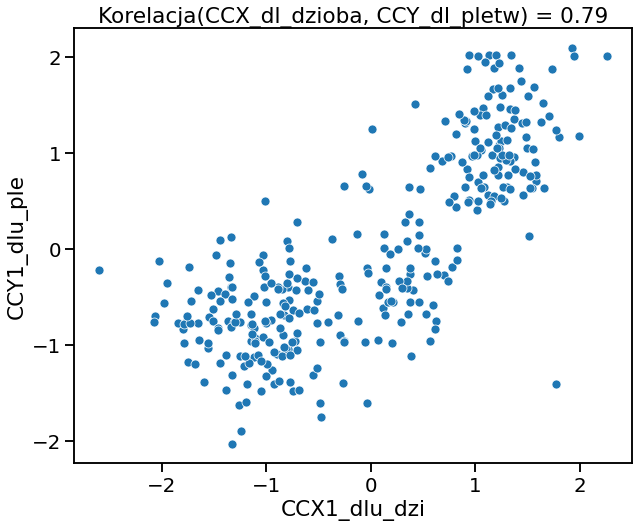

In [93]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX1_dlu_dzi",
                y="CCY1_dlu_ple", 
                data=kowa_kanon_res)
plt.title('Korelacja(CCX_dl_dzioba, CCY_dl_pletw) = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

<AxesSubplot:xlabel='Gatunek', ylabel='CCX1_dlu_dzi'>

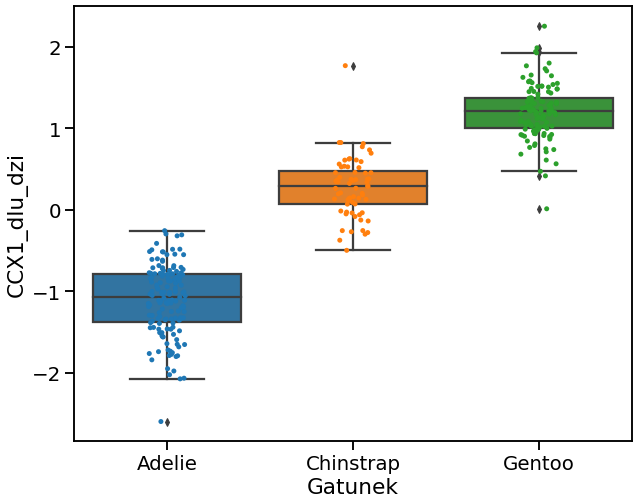

In [95]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Gatunek",
                y="CCX1_dlu_dzi", 
               data=kowa_kanon_res)
sns.stripplot(x="Gatunek",
                y="CCX1_dlu_dzi", 
                 data=kowa_kanon_res)

<AxesSubplot:xlabel='Gatunek', ylabel='CCY1_dlu_ple'>

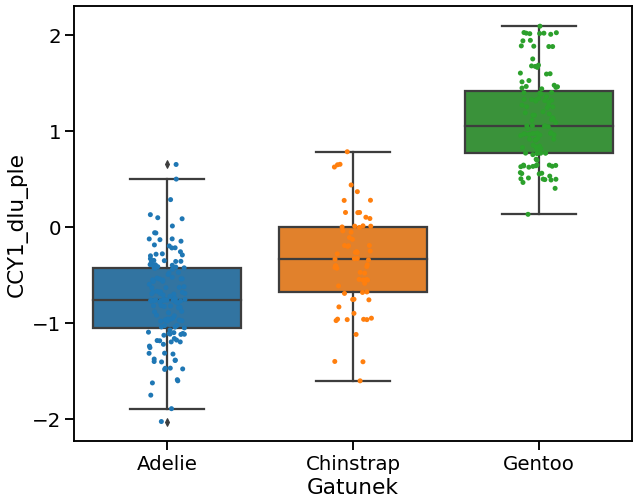

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Gatunek",
                y="CCY1_dlu_ple", 
                 data=kowa_kanon_res)
sns.stripplot(x="Gatunek",
                y="CCY1_dlu_ple", 
                 data=kowa_kanon_res)

Text(0.5, 1.0, 'Pierwsza para kowariancji kanonicznych, corr = 0.79')

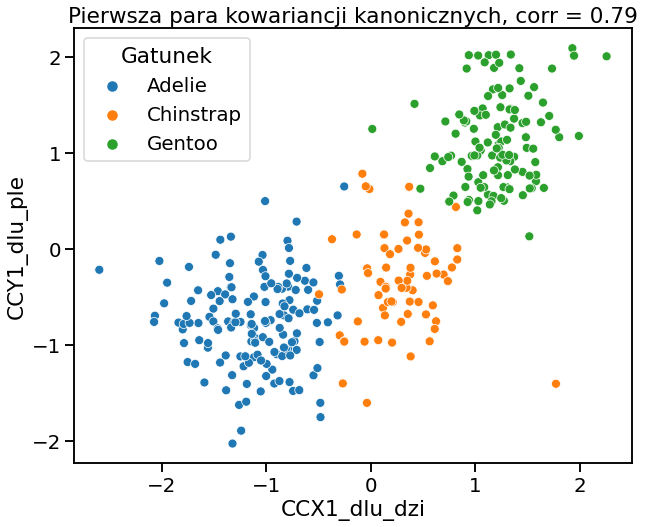

In [97]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX1_dlu_dzi",
                y="CCY1_dlu_ple", 
                hue="Gatunek", data=kowa_kanon_res)
plt.title('Pierwsza para kowariancji kanonicznych, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

In [110]:
kowa_kanon_X_df = pd.DataFrame({"CCX1_dlu_dzi":X_c[:, 0],
                       "CCX2_sze_dzi":X_c[:, 1],
                       "Gatunek":df.species.astype('category').cat.codes,
                       "Wyspa":df.island.astype('category').cat.codes,
                       "plec":df.sex.astype('category').cat.codes,
                       "dlugosc_dzioba":X_mc.bill_length_mm,
                       "szerokosc_dzioba":X_mc.bill_depth_mm})
kowa_kanon_X_df.head()

CCX1_dlu_dzi  CCX2_sze_dzi  Gatunek  Wyspa  plec  dlugosc_dzioba  \
0     -1.186252     -0.010367        0      2     1       -0.894695   
1     -0.709573     -0.456036        0      2     0       -0.821552   
2     -0.790732     -0.130809        0      2     0       -0.675264   
4     -1.718663     -0.073623        0      2     0       -1.333559   
5     -1.772295      0.736248        0      2     1       -0.858123   

   szerokosc_dzioba  
0          0.779559  
1          0.119404  
2          0.424091  
4          1.084246  
5          1.744400

In [114]:
korel_X_df= kowa_kanon_X_df.corr(method='pearson') 
korel_X_df.head()

CCX1_dlu_dzi  CCX2_sze_dzi   Gatunek     Wyspa      plec  \
CCX1_dlu_dzi  1.000000e+00  2.158913e-16  0.935057 -0.561781  0.025383   
CCX2_sze_dzi  2.158913e-16  1.000000e+00 -0.078719  0.228933  0.576790   
Gatunek       9.350575e-01 -7.871884e-02  1.000000 -0.622428  0.010964   
Wyspa        -5.617810e-01  2.289327e-01 -0.622428  1.000000 -0.012435   
plec          2.538332e-02  5.767897e-01  0.010964 -0.012435  1.000000   

              dlugosc_dzioba  szerokosc_dzioba  
CCX1_dlu_dzi        0.828437         -0.734650  
CCX2_sze_dzi        0.560082          0.678447  
Gatunek             0.730548         -0.740346  
Wyspa              -0.337179          0.568031  
plec                0.344078          0.372673

In [126]:
X_df_lt = korel_X_df.where(np.tril(np.ones(korel_X_df.shape)).astype(np.bool))
X_df_lt.head()

CCX1_dlu_dzi  CCX2_sze_dzi   Gatunek     Wyspa  plec  \
CCX1_dlu_dzi  1.000000e+00           NaN       NaN       NaN   NaN   
CCX2_sze_dzi  2.158913e-16      1.000000       NaN       NaN   NaN   
Gatunek       9.350575e-01     -0.078719  1.000000       NaN   NaN   
Wyspa        -5.617810e-01      0.228933 -0.622428  1.000000   NaN   
plec          2.538332e-02      0.576790  0.010964 -0.012435   1.0   

              dlugosc_dzioba  szerokosc_dzioba  
CCX1_dlu_dzi             NaN               NaN  
CCX2_sze_dzi             NaN               NaN  
Gatunek                  NaN               NaN  
Wyspa                    NaN               NaN  
plec                     NaN               NaN

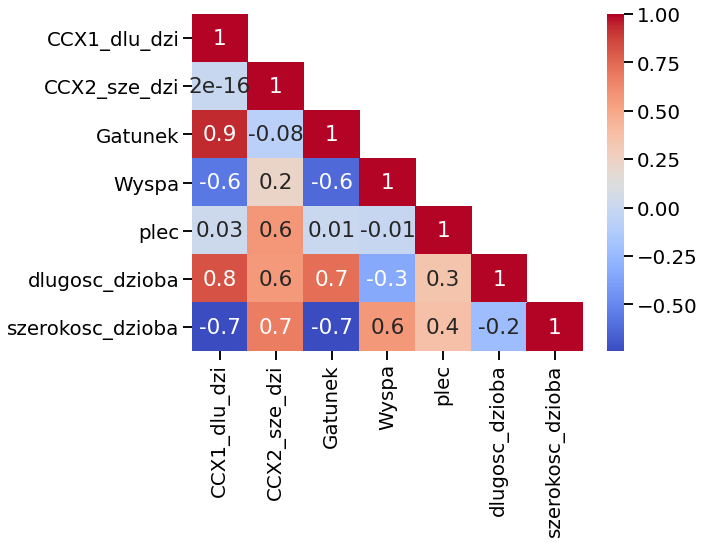

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(X_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()

In [117]:
kowa_kanon_Y_df = pd.DataFrame({"CCY1_dlu_ple":Y_c[:, 0],
                       "CCY2_mas_cia":Y_c[:, 1],
                       "Gatunek":df.species.astype('category').cat.codes,
                      "Wyspa":df.island.astype('category').cat.codes,
                      "plec":df.sex.astype('category').cat.codes,
                       "dlugosc_pletw":Y_mc.flipper_length_mm,
                      "masa_ciala":Y_mc.body_mass_g})
kowa_kanon_Y_df.head()

CCY1_dlu_ple  CCY2_mas_cia  Gatunek  Wyspa  plec  dlugosc_pletw  masa_ciala
0     -1.408795      0.682866        0      2     1      -1.424608   -0.567621
1     -1.053857      0.429879        0      2     0      -1.067867   -0.505525
2     -0.393550     -0.839620        0      2     0      -0.425733   -1.188572
4     -0.542888     -0.458571        0      2     0      -0.568429   -0.940192
5     -0.763548     -0.014204        0      2     1      -0.782474   -0.691811

In [121]:
korel_Y_df= kowa_kanon_Y_df.corr(method='pearson') 
korel_Y_df.head()

CCY1_dlu_ple  CCY2_mas_cia   Gatunek     Wyspa      plec  \
CCY1_dlu_ple  1.000000e+00 -1.280692e-15  0.850446 -0.552278  0.249564   
CCY2_mas_cia -1.280692e-15  1.000000e+00  0.027359 -0.162312  0.418009   
Gatunek       8.504455e-01  2.735874e-02  1.000000 -0.622428  0.010964   
Wyspa        -5.522776e-01 -1.623123e-01 -0.622428  1.000000 -0.012435   
plec          2.495635e-01  4.180092e-01  0.010964 -0.012435  1.000000   

              dlugosc_pletw  masa_ciala  
CCY1_dlu_ple       0.999909    0.866333  
CCY2_mas_cia       0.013464    0.499467  
Gatunek            0.850737    0.750434  
Wyspa             -0.554413   -0.559526  
plec               0.255169    0.424987

In [127]:
Y_df_lt = korel_Y_df.where(np.tril(np.ones(korel_Y_df.shape)).astype(np.bool))
Y_df_lt.head()

CCY1_dlu_ple  CCY2_mas_cia   Gatunek     Wyspa  plec  \
CCY1_dlu_ple  1.000000e+00           NaN       NaN       NaN   NaN   
CCY2_mas_cia -1.280692e-15      1.000000       NaN       NaN   NaN   
Gatunek       8.504455e-01      0.027359  1.000000       NaN   NaN   
Wyspa        -5.522776e-01     -0.162312 -0.622428  1.000000   NaN   
plec          2.495635e-01      0.418009  0.010964 -0.012435   1.0   

              dlugosc_pletw  masa_ciala  
CCY1_dlu_ple            NaN         NaN  
CCY2_mas_cia            NaN         NaN  
Gatunek                 NaN         NaN  
Wyspa                   NaN         NaN  
plec                    NaN         NaN

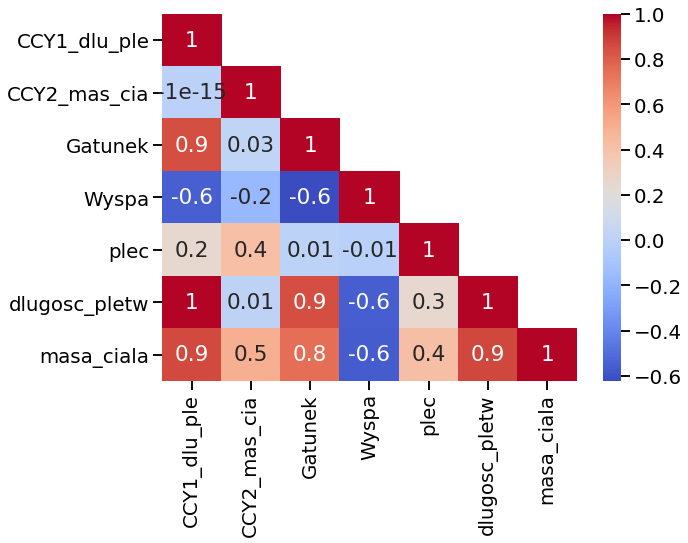

In [128]:
plt.figure(figsize=(10,8))
sns.heatmap(Y_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()

Text(0.5, 1.0, 'Druga para kowariancji kanonicznych, corr = 0.09')

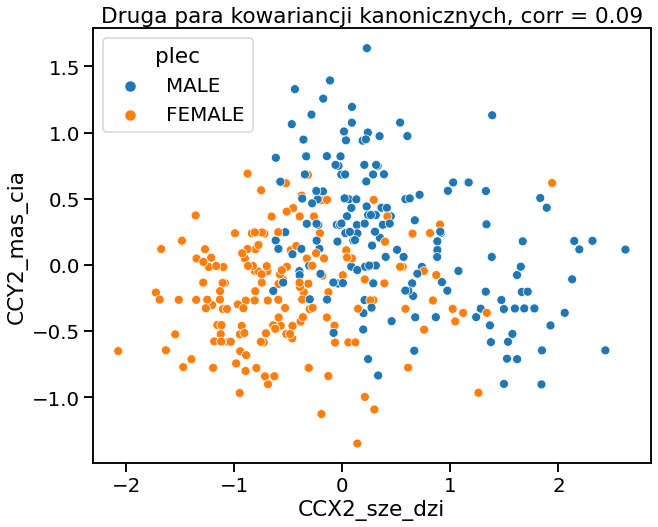

In [131]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX2_sze_dzi",
                y="CCY2_mas_cia", 
                hue="plec", data=kowa_kanon_res)
plt.title('Druga para kowariancji kanonicznych, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])